In [1]:
import wfdb
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
def downsample_by_averaging(signal, factor):
    downsampled_signal = []
    
    for i in range(0, len(signal), factor): # moves by index of 8
        chunk = signal[i:i+factor, :] 
        downsampled_signal.append(np.mean(chunk, axis=0))  # avg of each column
        
    return np.array(downsampled_signal)


In [ ]:
list=[] #takes all the subjects 
directory="non-eeg-dataset-for-assessment-of-neurological-status-1.0.0" # directory to all the files ATR, DAT, HEA
for i in range(1,21):
    ACCTEMPEDA_Path = os.path.join(directory, f'Subject{i}_AccTempEDA') 
    SPO2HR_Path = os.path.join(directory, f'Subject{i}_SpO2HR') 

    ACCTEMPEDA_Record = wfdb.rdrecord(ACCTEMPEDA_Path) #  rdrecord read .dat and .hea file
    SPO2HR_Record = wfdb.rdrecord(SPO2HR_Path) 
    annotations = wfdb.rdann(ACCTEMPEDA_Path, 'atr') # rdann reads .atr file

    ACCTEMPEDA_DownSampled = downsample_by_averaging(ACCTEMPEDA_Record.p_signal, 8) # downsample ACCTEMP EDA as it is 8 HZ
    ACCTEMPEDA_DownSampled_Record = wfdb.Record(
        record_name=f'Subject{i}_AccTempEDA_DownSampled', 
        p_signal=ACCTEMPEDA_DownSampled, 
        fs=1,
        sig_name=ACCTEMPEDA_Record.sig_name,
        units=ACCTEMPEDA_Record.units        
    )
    list.append({
            'subject_id': i,
            'acc_temp_eda': ACCTEMPEDA_DownSampled_Record,
            'spo2_hr': SPO2HR_Record,
            'annotations': annotations
        }
    )

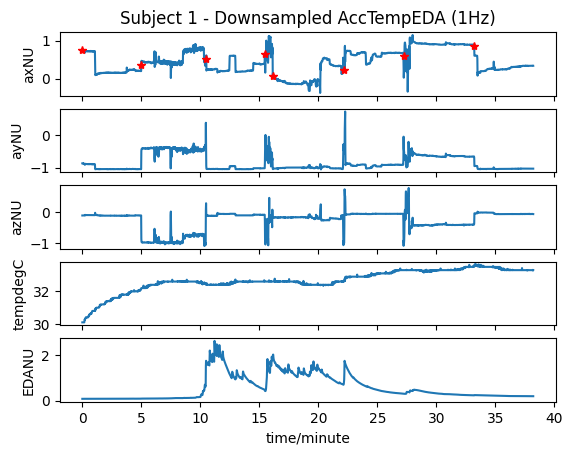

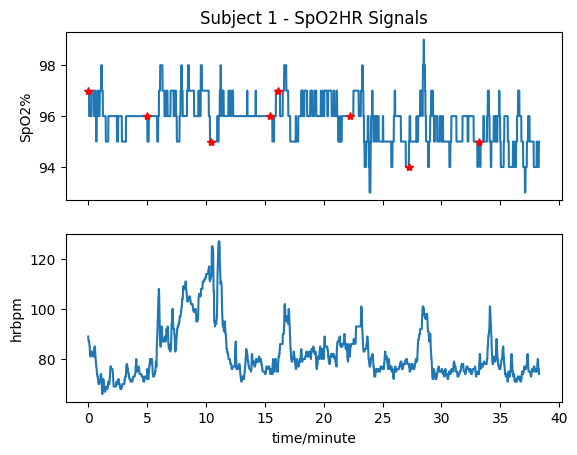

In [5]:
subject = list[0]  
wfdb.plot_wfdb( record=subject['acc_temp_eda'], annotation=subject['annotations'], time_units='minutes', title='Subject 1 - Downsampled AccTempEDA (1Hz)')
wfdb.plot_wfdb( record=subject['spo2_hr'], annotation=subject['annotations'], time_units='minutes', title='Subject 1 - SpO2HR Signals')